In [1]:
# Parameters - This cell is tagged for papermill parameter injection
country = "demo"
training_start_date = "demo"
training_end_date = "demo"
base_model_path = "demo"

In [2]:
print(f"Country: {country}")
print(f"Training period: {training_start_date} to {training_end_date}")
print(f"Base model path: {base_model_path}")

Country: demo
Training period: demo to demo
Base model path: demo


In [3]:
import yaml
import os
from pymc_marketing.utils import from_netcdf

# Load the base model configuration
print(f"Loading base model configuration from: {base_model_path}")

# Check if file exists
if not os.path.exists(base_model_path):
    print(f"Warning: Base model file not found at {base_model_path}")
    print("Creating a dummy configuration...")
    with open("../../model builders/base_model.yml", 'r') as file:
        base_model_config = yaml.safe_load(file)
else:
    with open(base_model_path, 'r') as file:
        base_model_config = yaml.safe_load(file)
    print("✅ Base model configuration loaded successfully")

print(f"Base model config: {base_model_config}")

Loading base model configuration from: demo
Creating a dummy configuration...
Base model config: {'model': {'class': 'pymc_marketing.mmm.multidimensional.MMM', 'kwargs': {'date_column': 'date', 'channel_columns': ['paidm_soc_fb_excl_cbpr2_imp', 'paidm_dsp_google_imp', 'paidm_search_generic_google_imp', 'paidm_search_brand_google_imp', 'paidm_dsp_ttd_imp', 'paidm_search_generic_apple_imp', 'paidm_search_brand_apple_imp', 'paidm_search_generic_bing_imp', 'paidm_search_brand_bing_imp', 'paidm_soc_tw_imp', 'paidm_soc_reddit_imp', 'paidm_soc_tiktok_imp', 'paidm_audio_weighted_imp', 'paidm_audio_podscribe_imp', 'paidm_tv_imp'], 'target_column': 'kpi_registrations', 'dims': ['market'], 'scaling': {'target': {'method': 'max', 'dims': []}, 'channel': {'method': 'max', 'dims': []}}, 'adstock': {'class': 'pymc_marketing.mmm.GeometricAdstock', 'kwargs': {'l_max': 24, 'priors': {'alpha': {'distribution': 'Beta', 'alpha': 1.0, 'beta': 3.0, 'dims': ['market', 'channel']}}}}, 'saturation': {'class': '

In [4]:
import warnings

In [5]:
## Add ../.. to the path to import from the parent directory
import sys
sys.path.append("../..")

In [6]:
from wise.preprocessing import clean_data

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

import pytensor
import pytensor.tensor as pt

import pymc as pm

from pymc_marketing.plot import plot_curve
from pymc_marketing.prior import Prior
from pymc_marketing.mmm.builders.yaml import build_mmm_from_yaml

/opt/anaconda3/envs/wise_env/lib/python3.12/site-packages/pymc_marketing/mmm/multidimensional.py:68: FutureWarning: This functionality is experimental and subject to change. If you encounter any issues or have suggestions, please raise them at: https://github.com/pymc-labs/pymc-marketing/issues/new
  warnings.warn(warning_msg, FutureWarning, stacklevel=1)
/var/folders/c4/zk_dn24x6bb_j3wg63h3d2m80000gp/T/ipykernel_91174/4114199942.py:14: UserWarning: The pymc_marketing.mmm.builders module is experimental and its API may change without warning.
  from pymc_marketing.mmm.builders.yaml import build_mmm_from_yaml


In [8]:
plt.style.use('seaborn-v0_8')
plt.rcParams['font.size'] = 14

plt.rcParams['axes.labelsize'] = 6
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['axes.titleweight'] = 'bold'


plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

In [9]:
%reload_ext autoreload
%autoreload 2

In [10]:
warnings.filterwarnings('ignore')

In [11]:
pytensor.config.floatX = "float32"

In [12]:
data = pd.read_csv("../../data/csv/full_dataset.csv")
data.head()

,DATE,MARKET,TEST_FLAG,UNIQUE_KEY,KPI_REGISTRATIONS,KPI_XCCY_NU,SEASONALITY,TREND,SEO_CONTENT_DISTINCT_VISITORS,SEO_PRODUCTS_DISTINCT_VISITORS,...,PAIDM_AUDIO_PODSCRIBE_REACH,PAIDM_TV_SPD_GBP,PAIDM_TV_IMP,WISE_PLATFORM_DISTINCT_VISITORS,ORGANIC_SOCIAL_DISTINCT_VISITORS,ORGANIC_SOCIAL_DISTINCT_VISITORS_ADJ,OWNED_PARTNERS_DISTINCT_VISITORS,_AIRFLOW_RUN_ID,_SDC_BATCHED_AT,_SDC_LOADED_AT
0,2024-04-10,BRA,1,e5eee5d12d8bef6d8b464478ada5a8ec,0,0,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,scheduled__2025-04-05T11:00:00+00:00,2025-04-05 11:00:00.000,2025-04-06 12:08:48.627 Z
1,2023-05-30,USA,1,ee85c4dfa79afc2d3360d48f42cad40d,0,0,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,scheduled__2025-04-05T11:00:00+00:00,2025-04-05 11:00:00.000,2025-04-06 12:08:48.627 Z
2,2025-01-05,USA,1,cc269f69399b5c11e61453763593b607,0,0,0.0,0.0,0,0,...,2,0.0,0,0,0,0,0,scheduled__2025-04-05T11:00:00+00:00,2025-04-05 11:00:00.000,2025-04-06 12:08:48.627 Z
3,2023-06-05,BRA,1,359b198e59bce68dea912c264c230088,0,0,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,scheduled__2025-04-05T11:00:00+00:00,2025-04-05 11:00:00.000,2025-04-06 12:08:48.627 Z
4,2024-02-16,DEU,1,5f997ea491bbe58e32d750c479b5c018,0,0,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,scheduled__2025-04-05T11:00:00+00:00,2025-04-05 11:00:00.000,2025-04-06 12:08:48.627 Z


In [13]:
model_data = clean_data(
    dataset=data,
    countries_list=["GBR"],
    target_column=base_model_config["model"]["kwargs"]["target_column"],
    date_column=base_model_config["model"]["kwargs"]["date_column"],
    dims=tuple(base_model_config["model"]["kwargs"]["dims"]),
)

In [14]:
model_data[base_model_config["model"]["kwargs"]["date_column"]].min(), model_data[base_model_config["model"]["kwargs"]["date_column"]].max()

('2022-01-01', '2025-04-05')

In [15]:
X = model_data.drop(columns=[base_model_config["model"]["kwargs"]["target_column"]]).fillna(0)
y = model_data[[base_model_config["model"]["kwargs"]["target_column"]]].fillna(0)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1191, 17)
y shape: (1191, 1)


In [16]:
for col in X.columns:
    if X[col].dtype in ['int64', 'int32']:
        X[col] = X[col].astype('int32')
    elif X[col].dtype in ['float64', 'float32']:
        X[col] = X[col].astype('float32')

y[base_model_config["model"]["kwargs"]["target_column"]] = y[base_model_config["model"]["kwargs"]["target_column"]].astype('int32')

In [17]:
import glob
import os

saved_path = f"../../.ignore_folder/nc_files/{country}/"

# Recursively find all .nc files in the country folder and its subfolders
nc_files = glob.glob(os.path.join(saved_path, "**", "*.nc"), recursive=True)

if nc_files:
    # Get the most recently modified file
    latest_file = max(nc_files, key=os.path.getmtime)
    print(f"Latest file found: {latest_file}")
else:
    print(f"No .nc files found in {saved_path} or its subfolders")


Latest file found: ../../.ignore_folder/nc_files/demo/20250618/122150/model.nc


In [18]:
base_model_config["idata_path"] = latest_file

In [19]:
# import yaml

# Create the new file path under saved_path
new_config_path = os.path.join(saved_path, "model_config.yml")

# Save the base_model_config as YAML
with open(new_config_path, 'w') as file:
    yaml.dump(base_model_config, file, default_flow_style=False, indent=2)

print(f"Model configuration saved to: {new_config_path}")

Model configuration saved to: ../../.ignore_folder/nc_files/demo/model_config.yml


In [20]:
# We need to gather the idata before building the model
idata = from_netcdf(latest_file)

In [21]:
# Convert date column to datetime
X['date'] = pd.to_datetime(X['date'])

# Get the filtered X indices
training_X = X[X[base_model_config["model"]["kwargs"]["date_column"]] <= idata.constant_data.coords["date"].max().values]
test_X = X[X[base_model_config["model"]["kwargs"]["date_column"]] > idata.constant_data.coords["date"].max().values]

mmm = build_mmm_from_yaml(
    config_path=new_config_path,
    X=training_X,
    y=y.loc[training_X.index].squeeze(),
)

In [22]:
oos_posterior_predictive = mmm.sample_posterior_predictive(
    X=test_X, 
    extend_idata=False, 
    include_last_observations=True,
    var_names=["y", "y_original_scale"]
)

Sampling: [y]


Output()

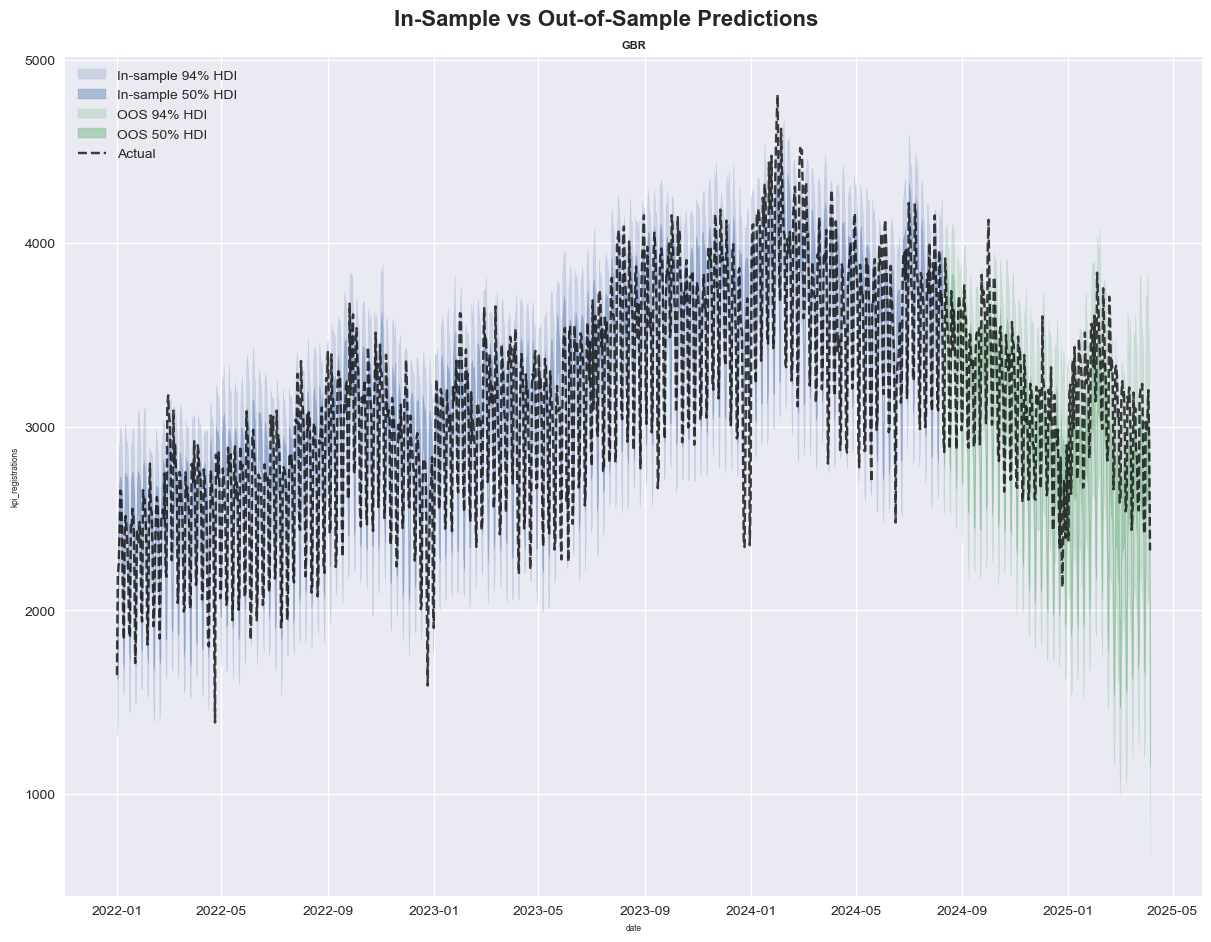

In [23]:
# Convert date column to datetime
model_data['date'] = pd.to_datetime(model_data['date'])

# Get the number of markets
n_markets = len(mmm.model.coords["market"])

fig, axes = plt.subplots(
    nrows=n_markets,
    figsize=(12, 9),
    sharex=True,
    sharey=True,
    layout="constrained",
)

# Ensure axes is always a list for consistent indexing
if n_markets == 1:
    axes = [axes]

for i, market in enumerate(mmm.model.coords["market"]):
    ax = axes[i]
    
    # Convert model coords to pandas datetime for consistent plotting
    in_sample_dates = pd.to_datetime(mmm.model.coords["date"])
    oos_dates = pd.to_datetime(oos_posterior_predictive.y_original_scale.coords["date"].values)
    
    # Get in-sample predictions for this market
    in_sample_preds = mmm.idata["posterior_predictive"].y_original_scale.sel(market=market)
    
    # Calculate HDI manually for in-sample
    in_sample_lower_94 = in_sample_preds.quantile(0.03, dim=["chain", "draw"])
    in_sample_upper_94 = in_sample_preds.quantile(0.97, dim=["chain", "draw"])
    in_sample_lower_50 = in_sample_preds.quantile(0.25, dim=["chain", "draw"])
    in_sample_upper_50 = in_sample_preds.quantile(0.75, dim=["chain", "draw"])
    
    # Plot in-sample HDI
    ax.fill_between(in_sample_dates, in_sample_lower_94, in_sample_upper_94, 
                    alpha=0.2, color="C0", label="In-sample 94% HDI")
    ax.fill_between(in_sample_dates, in_sample_lower_50, in_sample_upper_50, 
                    alpha=0.4, color="C0", label="In-sample 50% HDI")
    
    # Get out-of-sample predictions for this market
    oos_preds = oos_posterior_predictive.y_original_scale.sel(market=market)
    
    # Calculate HDI manually for out-of-sample (note: different dimension name 'sample')
    oos_lower_94 = oos_preds.quantile(0.03, dim="sample")
    oos_upper_94 = oos_preds.quantile(0.97, dim="sample")
    oos_lower_50 = oos_preds.quantile(0.25, dim="sample")
    oos_upper_50 = oos_preds.quantile(0.75, dim="sample")
    
    # Plot out-of-sample HDI
    ax.fill_between(oos_dates, oos_lower_94, oos_upper_94, 
                    alpha=0.2, color="C1", label="OOS 94% HDI")
    ax.fill_between(oos_dates, oos_lower_50, oos_upper_50, 
                    alpha=0.4, color="C1", label="OOS 50% HDI")
    
    # Plot actual data (full dataset)
    sns.lineplot(
        data=model_data.query("market == @market"),
        x="date",
        y=base_model_config["model"]["kwargs"]["target_column"],
        color="black",
        label="Actual",
        linestyle='--',
        alpha=0.75,
        ax=ax,
    )

    ax.legend(loc="upper left")
    ax.set(title=f"{market}")

fig.suptitle("In-Sample vs Out-of-Sample Predictions", fontsize=16, fontweight="bold", y=1.03);